In [1]:
%pylab inline


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Perfect sensor
def sense(x):
    return x

In [3]:
def simulate(Δt, x, u):
    x += Δt * u
    return x

In [4]:
def control(t, y, final_x):
    ### WRITE YOUR CONTROL POLICY HERE:
    
    #default control policy (circle)
    k = 100
    x_t = math.exp(-k * t) * (-y[0] + final_x[0]) + final_x[0]
    y_t = math.exp(-k * t) * (- y[1] + final_x[1]) + final_x[1]
    ux = k * (x_t - final_x[0])
    uy = k * (y_t - final_x[1])
    return array([ux, uy])
    
    

In [5]:
tf = 20.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = array([4., 5.])

# final conditions
x_final = array([2., 10.])

#x = array([1., 2.])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y, x_final)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

#remove last element of x_log so same elements as time
x_log = x_log[:-1]
print(x_log)

[[  4.           5.        ]
 [-16.          55.        ]
 [-15.99182801  54.97957003]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764  54.9795691 ]
 [-15.99182764

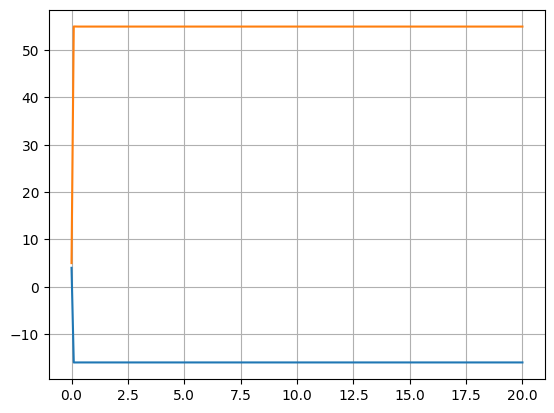

In [6]:
grid()
plot(time, x_log[:,0])
plot(time, x_log[:,1])

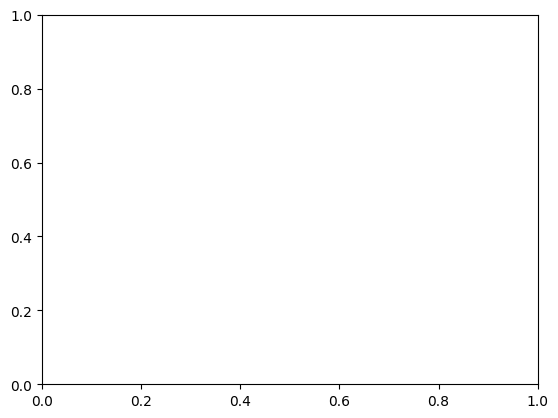

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    
    ax.clear()
    
    # Path
    #plot(x_log[:,0], x_log[:,1], 'r--')
    #plot(x_log[:,0], x_log[:,1], 'r--')
    # Initial conditions
    #plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())